<a href="https://colab.research.google.com/github/Keltings/ClassWork/blob/main/CAT169589_LKelida_DSA8203_CATII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk wordcloud
!pip install nltk textblob
# Download NLTK resources
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

import warnings
warnings.filterwarnings("ignore")

## PART I
### ANALYSING STOCK PRICE OF EAST AFRICAN BREWERIES LIMITED (EABL)

In [ ]:
stock13 = pd.read_csv('https://raw.githubusercontent.com/Keltings/ClassWork/main/NSE/Datasets/NSE_data_all_stocks_2013.csv')
stock14 = pd.read_csv('https://raw.githubusercontent.com/Keltings/ClassWork/main/NSE/Datasets/NSE_data_all_stocks_2014.csv')
stock15 = pd.read_csv('https://raw.githubusercontent.com/Keltings/ClassWork/main/NSE/Datasets/NSE_data_all_stocks_2015.csv')
stock16 = pd.read_csv('https://raw.githubusercontent.com/Keltings/ClassWork/main/NSE/Datasets/NSE_data_all_stocks_2016.csv')
stock17 = pd.read_csv('https://raw.githubusercontent.com/Keltings/ClassWork/main/NSE/Datasets/NSE_data_all_stocks_2017.csv')
stock18 = pd.read_csv('https://raw.githubusercontent.com/Keltings/ClassWork/main/NSE/Datasets/NSE_data_all_stocks_2018.csv')
stock19 = pd.read_csv('https://raw.githubusercontent.com/Keltings/ClassWork/main/NSE/Datasets/NSE_data_all_stocks_2019.csv')
stock20 = pd.read_csv('https://raw.githubusercontent.com/Keltings/ClassWork/main/NSE/Datasets/NSE_data_all_stocks_2020.csv')
sectors13 = pd.read_csv('https://raw.githubusercontent.com/Keltings/ClassWork/main/NSE/Datasets/NSE_data_stock_market_sectors_2013.csv')
sectors20 = pd.read_csv('https://raw.githubusercontent.com/Keltings/ClassWork/main/NSE/Datasets/NSE_data_stock_market_sectors_2020.csv')



In [ ]:
# merge the sectors dfs  for selection
merged_sectors = pd.concat( [sectors20, sectors13], axis=0)

# Remove duplicate rows
sectors = merged_sectors.drop_duplicates()
print(sectors.shape)


(78, 3)


In [ ]:
# merge the stocks dfs
merged_stocks = pd.concat( [stock13, stock14, stock15, stock16, stock17, stock18, stock19, stock20], axis=0)
#copy the new df
stocks = merged_stocks.copy()
stocks.head()

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust
0,2-Jan-13,EGAD,Eaagads Ltd,8.2,14,25,25,25,25,-,-,-,-
1,2-Jan-13,KUKZ,Kakuzi Plc,300,423.5,67.5,67.5,67.5,72,-4.5,6.25%,300,-
2,2-Jan-13,KAPC,Kapchorua Tea Kenya Plc,59,95,118,118,118,118,-,-,-,59
3,2-Jan-13,LIMT,Limuru Tea Plc,385,475,430,430,430,430,-,-,-,215
4,2-Jan-13,SASN,Sasini Plc,14.8,19.6,11.7,12.05,11.9,11.7,0.2,1.71%,"14,500",-


In [ ]:
# Perform the merge operation
stock_sectors = pd.merge(stocks, sectors, on="CODE", how="outer")

# Remove rows with null values
stock_sectors = stock_sectors.dropna()
# Write DataFrame to a CSV file
stock_sectors.to_csv("stock_sectors.csv", index=False)

# Clean up column names if necessary
stock_sectors.columns = stock_sectors.columns.str.lower().str.replace(" ", "_")

sectors_merged = stock_sectors.copy()



In [ ]:
def preprocess_stock_data(stock_data):
    # Subset to include only rows where name is 'East African Breweries Ltd'
    df = stock_data[stock_data['name_y'] == 'East African Breweries Ltd']
    dfc = df.copy()
    # Convert the date string to datetime object
    dfc['date'] = pd.to_datetime(dfc['date'])

    # Subset to include only rows where 'date3' is greater than or equal to start_date
    #start_date = pd.to_datetime("2018-01-01")
    df1 = dfc.copy()
    #df1 = df1[df1['date'] >= start_date]

    # Extract month and year from the 'date' column
    df1['month'] = df1['date'].dt.strftime("%m")
    df1['year'] = df1['date'].dt.strftime("%Y")

    # Remove specified columns
    columns_to_remove = ['code', 'sector', 'name_x', 'name_y','adjust']
    df2 = df1.copy()
    df2 = df2.drop(columns=columns_to_remove)


    # Convert all columns to numerical except for the 'date' column
    df3 = df2.copy()
    for column in df3.columns:
        if column != 'date':
            df3[column] = pd.to_numeric(df3[column], errors='coerce')

    return df3

# Test the function
eabl_stock = preprocess_stock_data(sectors_merged)
eabl_stock.head()


,date,12m_low,12m_high,day_low,day_high,day_price,previous,change,change%,volume,month,year
99345,2013-01-02,135,222.25,267.0,267.0,267.0,265.0,2.0,NaN,NaN,1,2013
99346,2013-01-03,135,222.25,265.0,268.0,267.0,267.0,NaN,NaN,NaN,1,2013
99347,2013-01-04,135,222.25,270.0,280.0,274.0,267.0,7.0,NaN,NaN,1,2013
99348,2013-01-07,135,222.25,270.0,275.0,272.0,274.0,-2.0,NaN,NaN,1,2013
99349,2013-01-08,135,222.25,272.0,295.0,280.0,272.0,8.0,NaN,NaN,1,2013


In [ ]:
eabl_stock = eabl_stock.set_index('date')

In [ ]:
# Drop columns with missing values
clean_stock= eabl_stock.dropna(axis=1)

# Display the cleaned DataFrame
clean_stock.shape


(1993, 8)

<ipython-input-45-3b4813c53898>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_stock['log_price'] = np.log(clean_stock['day_price'])


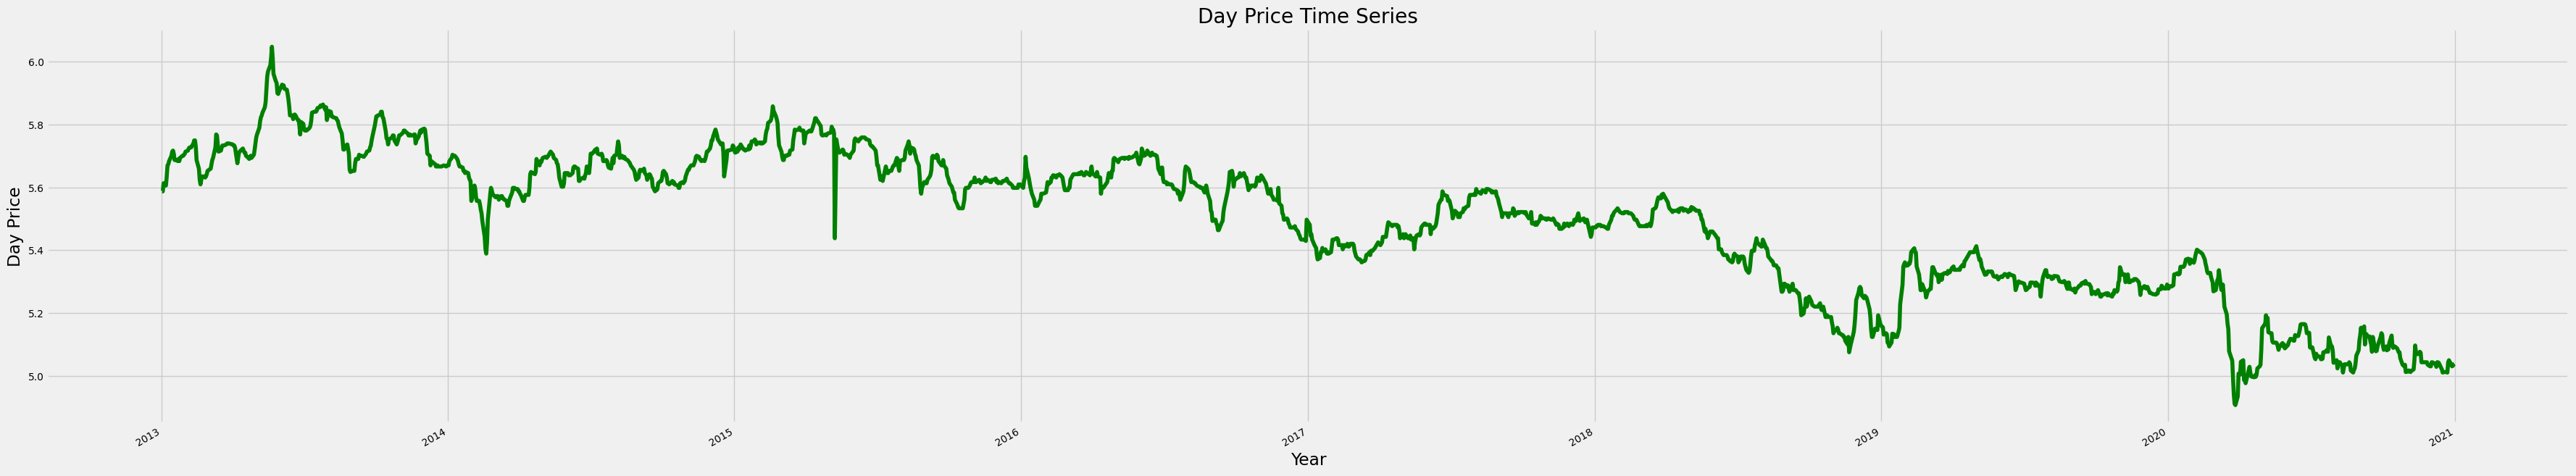

In [ ]:
# Log transformation of the prices
clean_stock['log_price'] = np.log(clean_stock['day_price'])
plt.style.use('fivethirtyeight')

df_subset = clean_stock['log_price']

# Plot the time series
plt.figure(figsize=(40, 8))
ax = df_subset.plot(color='green', fontsize=10)

# Set plot title and axis labels
ax.set_title('Day Price Time Series')
ax.set_xlabel('Year')
ax.set_ylabel('Day Price')

plt.show()


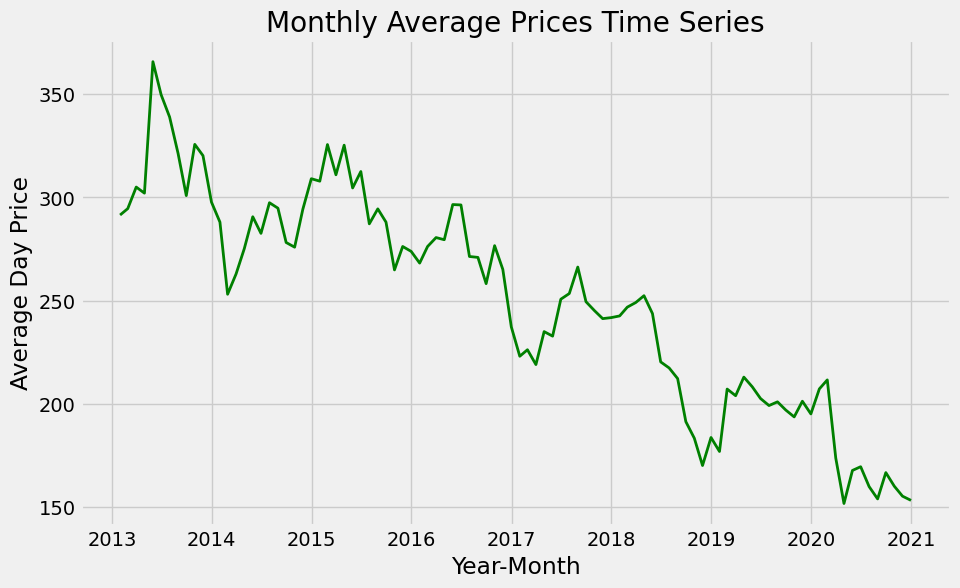

In [ ]:
# Resample the daily prices to monthly frequency and calculate the mean for each month
monthly_prices = clean_stock['day_price'].resample('M').mean()

# Drop NaN values if any
monthly_prices = monthly_prices.dropna()

# Increase the figure size
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Plot the time series of monthly average prices
plt.plot(monthly_prices, color='green', linewidth=2)

# Set plot title and axis labels
plt.title('Monthly Average Prices Time Series')
plt.xlabel('Year-Month')
plt.ylabel('Average Day Price')

plt.grid(True)

plt.show()

In [ ]:
monthly_prices=pd.DataFrame(monthly_prices)

In [ ]:
#Check for stationarity
adf_stats = adfuller(monthly_prices['day_price'])
x = 'the data is non stationary' if adf_stats[1] >= 0.05 else 'the data is stationary'
print(f'The p-value is: {round(adf_stats[1],2)} hence {x}')

The p-value is: 0.79 hence the data is non stationary


In [ ]:
#We need to make the data stationary
monthly_prices['day_price_diff'] = monthly_prices['day_price'].shift(1)
monthly_prices['day_price_change'] = monthly_prices['day_price'] - monthly_prices['day_price_diff']
monthly_prices['day_price'].dropna(inplace=True)
monthly_prices['day_price'].head()

date
2013-01-31    291.454545
2013-02-28    294.550000
2013-03-31    305.000000
2013-04-30    302.050000
2013-05-31    365.772727
Freq: M, Name: day_price, dtype: float64

In [ ]:
missing_values = monthly_prices['day_price_change'].isnull().sum()
print(f"Number of missing values in 'Day Price_change' column: {missing_values}")


Number of missing values in 'Day Price_change' column: 1


In [ ]:
# Impute missing values with the mean
monthly_prices['day_price_change'].fillna(monthly_prices['day_price_change'].mean(), inplace=True)


In [ ]:
#Check for stationarity
adf_stats = adfuller(monthly_prices['day_price_change'])
x = 'the data is non stationary' if adf_stats[1] >= 0.05 else 'the data is stationary'
print(f'The p-value is: {round(adf_stats[1],5)} hence {x}')

The p-value is: 0.0 hence the data is stationary


In [ ]:
monthly_prices.head()

,day_price,day_price_diff,day_price_change
date,,,
2013-01-31,291.454545,NaN,-1.455861
2013-02-28,294.550000,291.454545,3.095455
2013-03-31,305.000000,294.550000,10.450000
2013-04-30,302.050000,305.000000,-2.950000
2013-05-31,365.772727,302.050000,63.722727


**Since our data is now  stationary let us do prediction of day prices**

**We first get the acf and pacf of our daily price to get the order of the model**

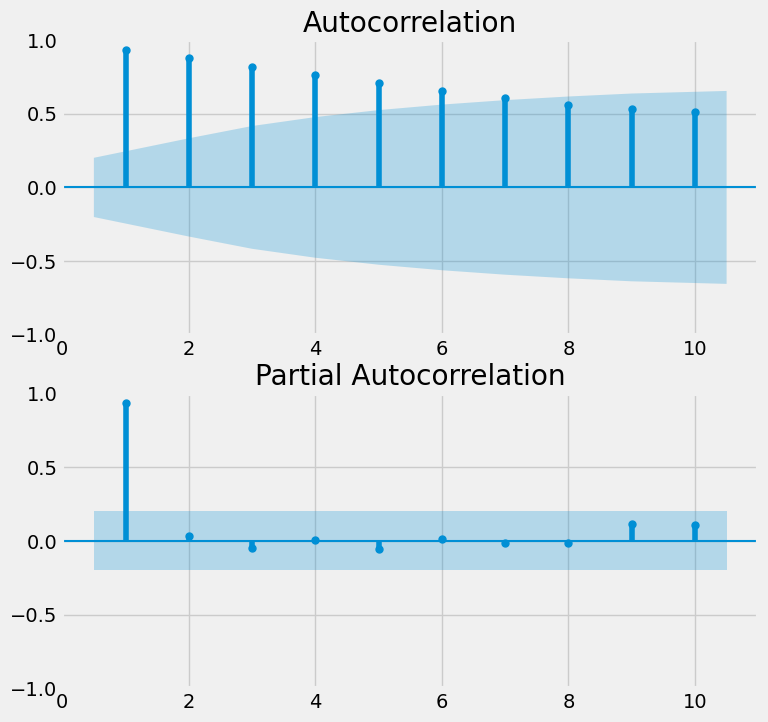

In [ ]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))
# Make ACF plot
plot_acf(monthly_prices['day_price_diff'].dropna(), lags=10, zero=False, ax=ax1,  linewidth=1.5)
# Make PACF plot
plot_pacf(monthly_prices['day_price_diff'].dropna(), lags=10, zero=False, ax=ax2,  linewidth=1.5)
plt.show()


**From the above plots this is an AR(p) model as the ACF Tails of while the PACF cuts off after a lag p**

In [ ]:
model = ARIMA(monthly_prices['day_price_change'], order=(8,0,1))
results = model.fit()

In [ ]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:       day_price_change   No. Observations:                   96
Model:                 ARIMA(8, 0, 1)   Log Likelihood                -388.374
Date:                Mon, 05 Feb 2024   AIC                            798.748
Time:                        07:31:31   BIC                            826.956
Sample:                    01-31-2013   HQIC                           810.150
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6299      0.350     -4.655      0.000      -2.316      -0.944
ar.L1          0.6993      0.170      4.107      0.000       0.366       1.033
ar.L2          0.0889      0.162      0.549      0.5

In [ ]:
#Make predictions for last 25 values
results = model.fit()
#Make in-sample prediction
forecast = results.get_prediction(start=-25)
# forecast mean
mean_forecast = forecast.predicted_mean

In [ ]:
# Get confidence intervals of forecasts
confidence_intervals = forecast.conf_int()
confidence_intervals

,lower day_price_change,upper day_price_change
date,,
2018-12-31,-18.839513,34.948468
2019-01-31,-20.165797,33.622181
2019-02-28,-16.021411,37.766565
2019-03-31,-25.999851,27.788124
2019-04-30,-20.486340,33.301633
2019-05-31,-26.048511,27.739460
2019-06-30,-23.800508,29.987462
2019-07-31,-24.936405,28.851564
2019-08-31,-25.890916,27.897052


**PLOTS FOR THE FORECATS OF OUR DAY PRICE**

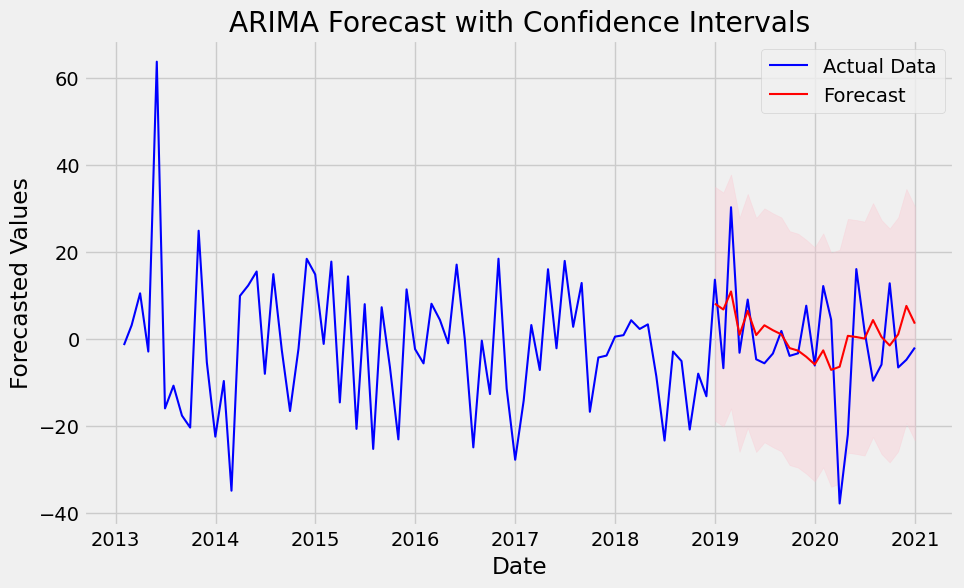

In [ ]:
# Plot actual data
plt.figure(figsize=(10, 6))
plt.plot(monthly_prices.index, monthly_prices['day_price_change'], label='Actual Data', color='blue',  linewidth=1.5)

# Plot the mean forecast
plt.plot(monthly_prices.index[-25:], mean_forecast.values, color='red', label='Forecast',  linewidth=1.5)

#Shade the uncertainty area
plt.fill_between(monthly_prices.index[-25:], confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Forecasted Values')
plt.title('ARIMA Forecast with Confidence Intervals')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## PART II
### SENTIMENT ANALYSIS OF EABL FINACIAL REPORT

In [ ]:
df = pd.read_excel('https://raw.githubusercontent.com/Keltings/ClassWork/main/NSE/Datasets/sentiments.xlsx')
report = df.copy()
report

,No.,QnNo,Question,CommentText,Response
0,1,2021,Annual Report,A better Future Emerging Stronger 2021 INTEGRA...,NaN
1,2,2022,Annual Report,EXCESSIVE ALCOHOL CONSUMPTION IS HARMFUL TO YO...,NaN
2,3,2023,Annual Report,2 Integrated Report & Financial Statements 202...,NaN


In [ ]:
# Define a function to perform sentiment analysis using NLTK's Vader
def analyze_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Create a new DataFrame to store sentence-level results
sentiment_df = pd.DataFrame(columns=['Sentence', 'Sentiment', 'Year'])

# Iterate through each row, tokenize the text into sentences, and perform sentiment analysis
for index, row in df.iterrows():
    text = row['CommentText']
    year = row['QnNo']

    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # Perform sentiment analysis for each sentence
    for sentence in sentences:
        # Perform sentiment analysis using NLTK's Vader
        sentiment_vader = analyze_sentiment_vader(sentence)

        # Append the results to the new DataFrame
        sentiment_df = sentiment_df.append({'Sentence': sentence, 'Sentiment': sentiment_vader, 'Year': year}, ignore_index=True)

# Display the resulting DataFrame
sentiment_df.head()


,Sentence,Sentiment,Year
0,A better Future Emerging Stronger 2021 INTEGRA...,Positive,2021
1,"It comprises information about activities, str...",Neutral,2021
2,The aim is to comprehensively report to our ex...,Neutral,2021
3,Framework Our Integrated Report is prepared in...,Positive,2021
4,The Annual Financial Statements were prepared ...,Positive,2021


<Figure size 1200x800 with 0 Axes>

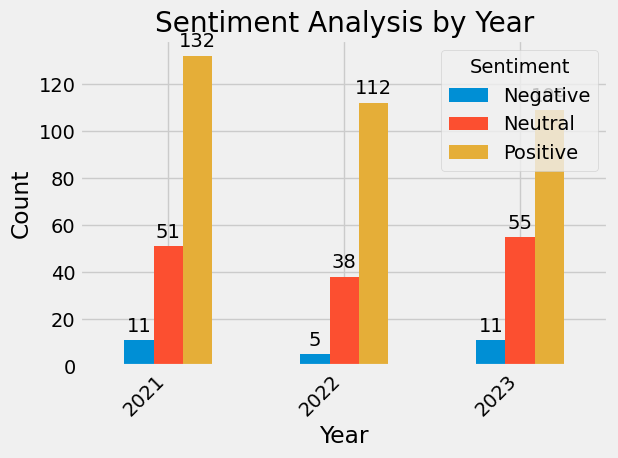

In [ ]:
# Group by year and sentiment
grouped_df = sentiment_df.groupby(['Year', 'Sentiment']).size().unstack(fill_value=0)

# Plot the sentiments for each year with a larger figure size
plt.figure(figsize=(12, 8))# Plot the sentiments for each year
ax = grouped_df.plot(kind='bar')
plt.title('Sentiment Analysis by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')

# Annotate bars with data values
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


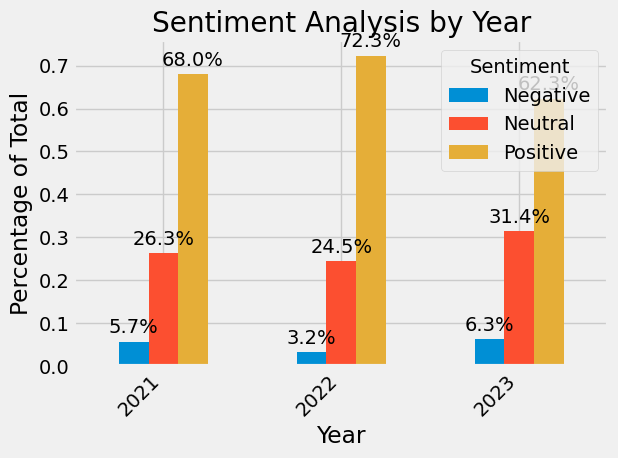

In [ ]:
# Calculate the total count for each year
total_counts = grouped_df.sum(axis=1)

# Plot the sentiments for each year
ax = grouped_df.div(total_counts, axis=0).plot(kind='bar')
plt.title('Sentiment Analysis by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Total')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')

# Annotate bars with percentage values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


In [ ]:
# Calculate the total count for each year
total_counts = grouped_df.sum(axis=1)

# Calculate the percentage of each sentiment count relative to the total count for each year
percentage_df = grouped_df.div(total_counts, axis=0)

# Display the resulting DataFrame
percentage_df


Sentiment,Negative,Neutral,Positive
Year,,,
2021,0.056701,0.262887,0.680412
2022,0.032258,0.245161,0.722581
2023,0.062857,0.314286,0.622857


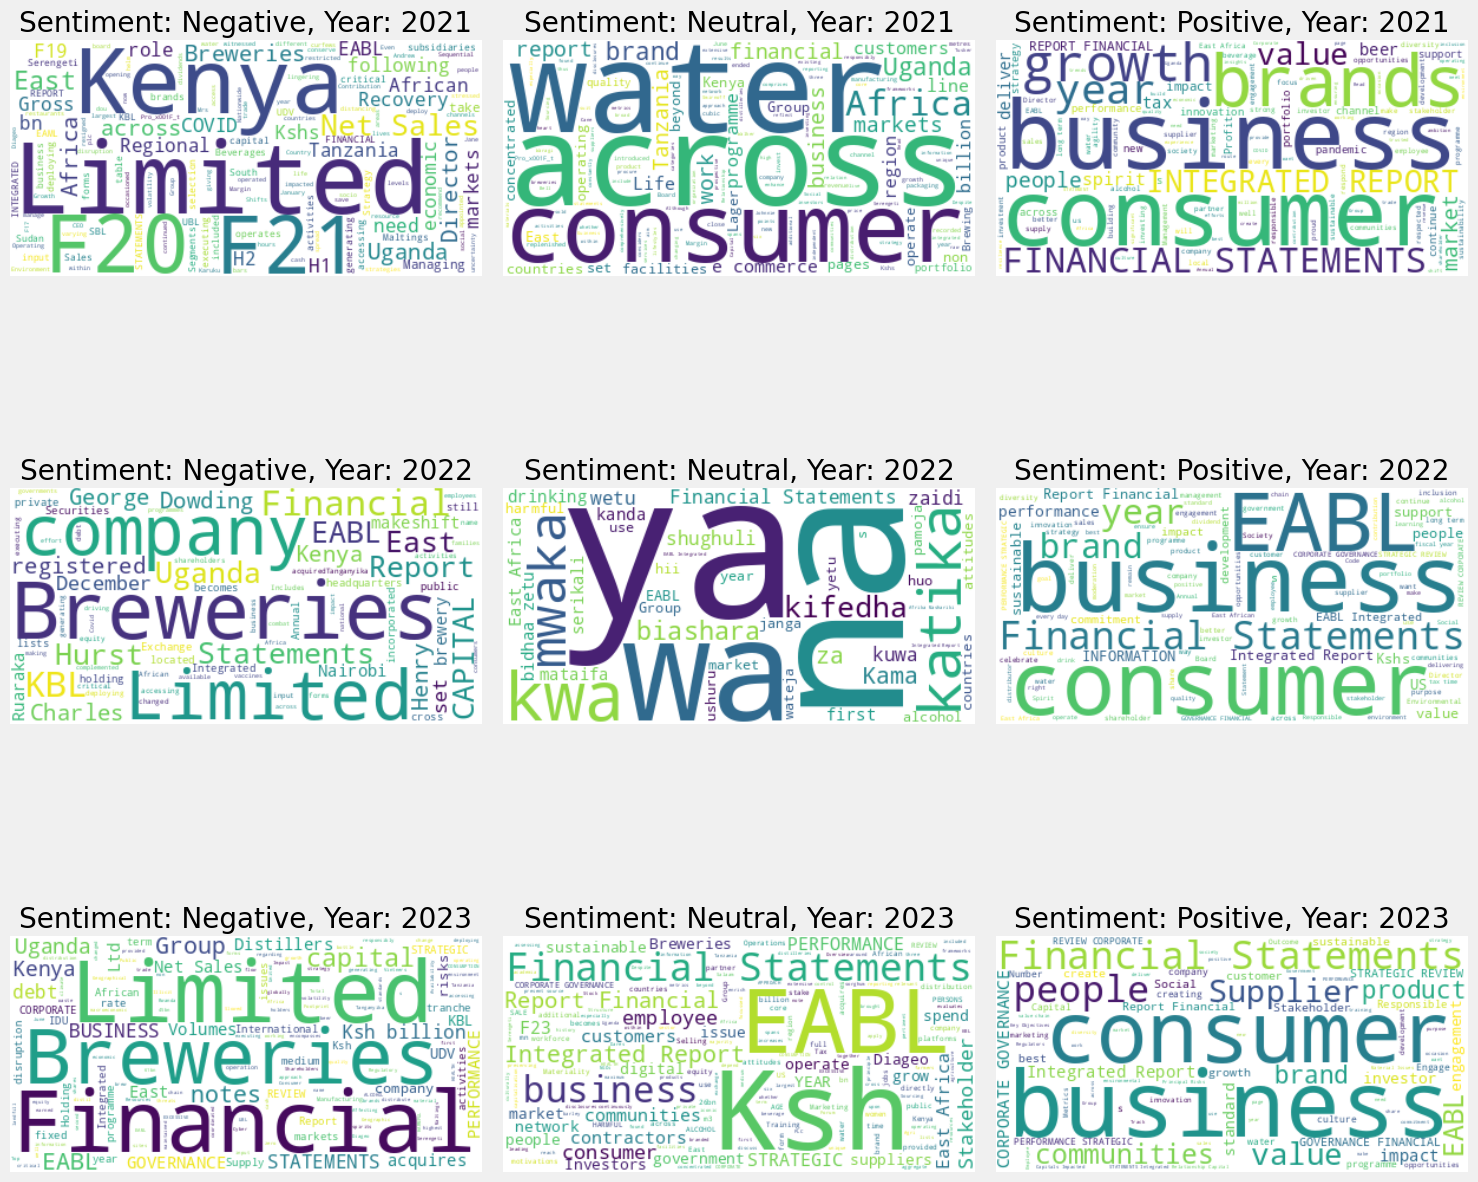

In [ ]:
# Define function to generate word cloud
def generate_word_cloud(text, title, position):
    plt.subplot(3, 3, position)
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')

# Group DataFrame by year and sentiment
grouped_df = sentiment_df.groupby(['Year', 'Sentiment'])

# Create a figure and set its size
plt.figure(figsize=(15, 15))

# Generate word clouds for each sentiment category within each year
position = 1
for (year, sentiment), group in grouped_df:
    sentences = ' '.join(group['Sentence'])
    title = f'Sentiment: {sentiment}, Year: {year}'
    generate_word_cloud(sentences, title, position)
    position += 1

# Adjust layout
plt.tight_layout()
plt.show()


### SUMMARY OF THE FINDINGS
